In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import xgboost
import lightgbm


C:\Users\User\Projects\Test\IIIMaterial\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Projects\Test\IIIMaterial\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Projects\Test\IIIMaterial\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Projects\Test\IIIMaterial\venv\l

In [2]:
mnist = input_data.read_data_sets('MNIST_data')
X_train = mnist.train.images
Y_train = mnist.train.labels
X_valid = mnist.test.images
Y_valid = mnist.test.labels

print("X_train.shape", X_train.shape)
print("Y_train.shape", Y_train.shape)
print("X_valid.shape", X_valid.shape)
print("Y_valid.shape", Y_valid.shape)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
X_train.shape (55000, 784)
Y_train.shap

7


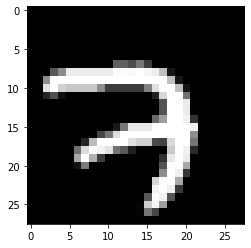

3


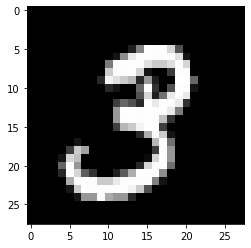

4


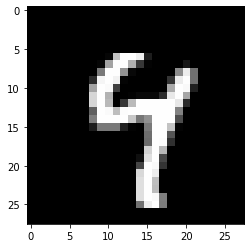

6


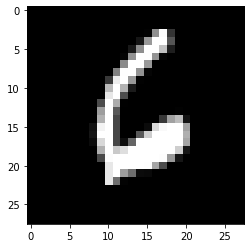

1


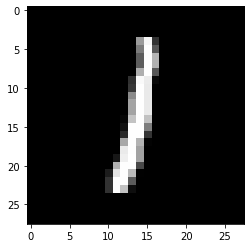

8


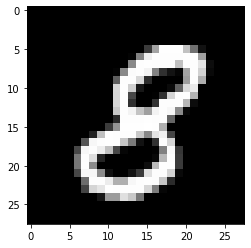

1


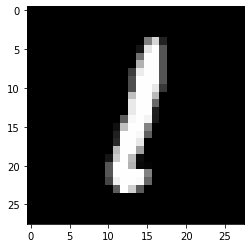

0


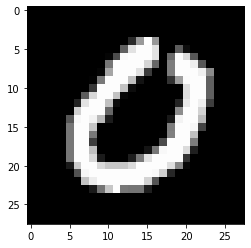

9


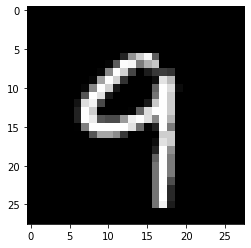

8


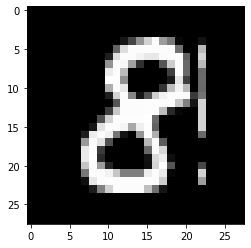

In [3]:
def print_minst_img(X):
    # 1. calculate its width & height using sqrt
    # 2. reshape the vector in width & height matrix (2 dimension)
    # 3. use plt.imshow with cmap='gray' parameter to draw the image
    #=============your works starts===============#
    width = int(np.sqrt(len(X)))
    X = X.reshape(width, width)
    plt.imshow(X, cmap='gray')
    #==============your works ends================#
    plt.show()

for i in range(10):
    print(Y_train[i])
    print_minst_img(X_train[i])


In [4]:
# %%time

# params = {}
# # Set our parameters for xgboost
# #=============your works starts===============#
# params['objective'] = 'multi:softmax'
# params['eval_metric'] = 'mlogloss'
# params['eta'] = 0.1
# params['max_depth'] = 3
# params['num_class'] = len(set(Y_train))
# params['seed'] = 2019
# #==============your works ends================#

# d_train = xgboost.DMatrix(X_train, label=Y_train)
# d_valid = xgboost.DMatrix(X_valid, label=Y_valid)
# watchlist = [(d_train, 'train'), (d_valid, 'valid')]
# bst = xgboost.train(params, d_train, 100, watchlist, early_stopping_rounds=10, verbose_eval=10)

# y_pred = bst.predict(xgboost.DMatrix(X_valid))
# print("Accuracy: ", str(np.sum(Y_valid == y_pred)/Y_valid.shape[0]))

In [5]:
# false_idxs = np.where(Y_valid != y_pred)[0]
# print(len(false_idxs))
# false_idxs = false_idxs[:10]
# for idx in false_idxs:
#     print(Y_valid[idx])
#     print(y_pred[idx])
#     print_minst_img(X_valid[idx])

In [6]:
%%time

params = {}
# Set our parameters for lightgbm
#=============your works starts===============#
params['objective'] =  "multiclass"
params['num_class'] =  len(set(Y_train))
params['num_leaves'] =  60
params['max_depth'] =  -1
params['learning_rate'] =  0.05
params['bagging_fraction'] =  0.8
params['feature_fraction'] =  0.8
params['bagging_freq'] =  5
params['verbosity'] =  1
params['seed'] =  2019

#==============your works ends================#

d_train = lightgbm.Dataset(X_train, Y_train)
d_valid = lightgbm.Dataset(X_valid, Y_valid)

lgb_model = lightgbm.train(params,
                           d_train,
                           valid_sets=d_valid,
                           num_boost_round=100,
                           early_stopping_rounds=100)

y_pred = lgb_model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy: ", str(np.sum(Y_valid == y_pred)/Y_valid.shape[0]))

[1]	valid_0's multi_logloss: 2.10914
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.95409
[3]	valid_0's multi_logloss: 1.82352
[4]	valid_0's multi_logloss: 1.71134
[5]	valid_0's multi_logloss: 1.61274
[6]	valid_0's multi_logloss: 1.52385
[7]	valid_0's multi_logloss: 1.44505
[8]	valid_0's multi_logloss: 1.37213
[9]	valid_0's multi_logloss: 1.30636
[10]	valid_0's multi_logloss: 1.24526
[11]	valid_0's multi_logloss: 1.18925
[12]	valid_0's multi_logloss: 1.13729
[13]	valid_0's multi_logloss: 1.08902
[14]	valid_0's multi_logloss: 1.04319
[15]	valid_0's multi_logloss: 1.00101
[16]	valid_0's multi_logloss: 0.960663
[17]	valid_0's multi_logloss: 0.923131
[18]	valid_0's multi_logloss: 0.88784
[19]	valid_0's multi_logloss: 0.854367
[20]	valid_0's multi_logloss: 0.822639
[21]	valid_0's multi_logloss: 0.792837
[22]	valid_0's multi_logloss: 0.764392
[23]	valid_0's multi_logloss: 0.737346
[24]	valid_0's multi_logloss: 0.711633
[25]	valid_0's multi_loglo

355
3
2


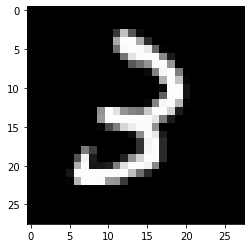

7
4


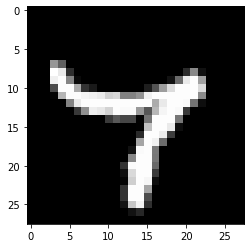

2
9


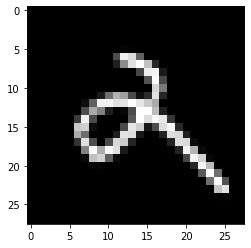

9
8


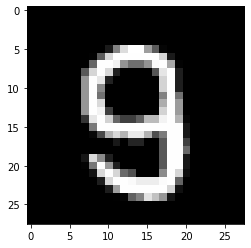

4
6


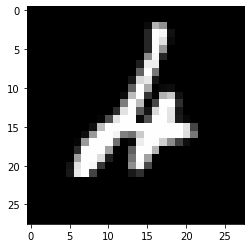

6
0


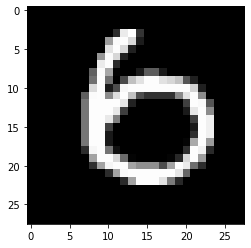

9
1


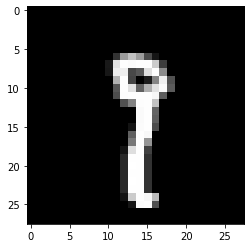

2
7


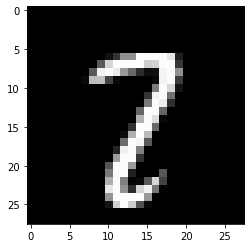

5
3


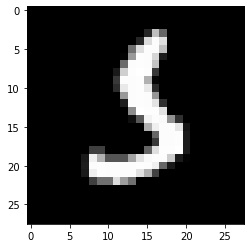

3
7


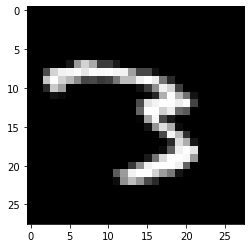

In [7]:
false_idxs = np.where(Y_valid != y_pred)[0]
print(len(false_idxs))
false_idxs = false_idxs[:10]
for idx in false_idxs:
    print(Y_valid[idx])
    print(y_pred[idx])
    print_minst_img(X_valid[idx])

In [8]:
lgb_model.save_model('lgb_model.txt', num_iteration=lgb_model.best_iteration) 
lgb_model = lightgbm.Booster(model_file='lgb_model.txt')
y_pred = lgb_model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy: ", str(np.sum(Y_valid == y_pred)/Y_valid.shape[0]))

Accuracy:  0.9645


In [9]:
if not os.path.isdir('testing_images'):
    os.mkdir("testing_images")
    
def convert_to_img(X):
    width = int(np.sqrt(len(X)))
    return X.reshape((width, width))

for idx in range(len(X_valid))[:20]:
    x = X_valid[idx]
    y = Y_valid[idx]
    filename = ("%2i"%idx).replace(" ", "0") + "_" + str(y) + '.png'
    filepath = os.path.join("testing_images", filename)
    plt.imsave(filepath, convert_to_img(x), cmap='gray')